In [2]:
from dotenv import dotenv_values
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
spark = SparkSession.builder.master(
    "local[*]").appName("Kevin Ang Data Visualization").getOrCreate()

config = dotenv_values(".env")
dbuser = config["dbuser"]
dbpass = config["dbpass"]


In [3]:
loan_df = spark.read.format("jdbc").options(driver="com.mysql.cj.jdbc.Driver",
                                            user=dbuser,
                                            password=dbpass,
                                            url="jdbc:mysql://localhost:3306/creditcard_capstone",
                                            dbtable="creditcard_capstone.CDW_SAPP_LOAN_APPLICATION").load()

loan_pandas_df = loan_df.toPandas()

In [4]:
columns = ['Gender', 'Married', 'Income', 'Application_Status']
reduced_df = loan_pandas_df[columns]
reduced_df_filtered = reduced_df[(reduced_df['Married'] == 'Yes') & (
    reduced_df['Application_Status'] == 'Y')]

reduced_df_filtered = reduced_df_filtered[['Gender', 'Income']]
male_df_filtered = reduced_df_filtered[reduced_df_filtered['Gender'] == 'Male']
female_df_filtered = reduced_df_filtered[reduced_df_filtered['Gender'] == 'Female']

incomeBrackets = reduced_df_filtered['Income'].unique()

male_data = male_df_filtered.groupby('Income').count().reindex(incomeBrackets)
female_data = female_df_filtered.groupby(
    'Income').count().reindex(incomeBrackets)

male_data = male_data['Gender'].values.tolist()
female_data = female_data['Gender'].values.tolist()

app_df = pd.DataFrame({'Income': incomeBrackets,
                       'Male': male_data,
                       'Female': female_data
                       })



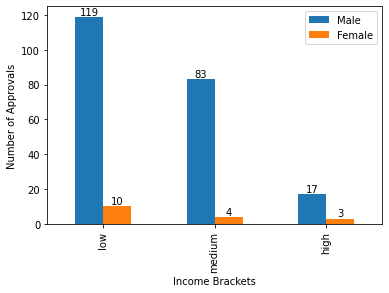

In [8]:
applications_plot = app_df.plot(x="Income", kind='bar',xlabel='Income Brackets',ylabel='Number of Approvals')

applications_plot.bar_label(applications_plot.containers[0])
applications_plot.bar_label(applications_plot.containers[1])

plt.show()


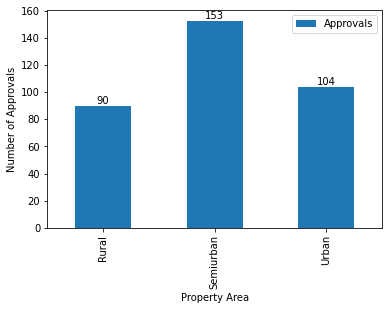

In [14]:
property_df = loan_pandas_df[['Property_Area', 'Application_Status']]
property_df = property_df[property_df['Application_Status'] == 'Y']
property_df = property_df.groupby('Property_Area').count()
property_plot = property_df.plot(kind='bar',
                                 xlabel='Property Area',
                                 ylabel='Number of Approvals')
property_plot.legend(["Approvals"])
property_plot.bar_label(property_plot.containers[0])


plt.show()
